<a href="https://colab.research.google.com/github/Atadewa/AchieveIT/blob/main/Week05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D1 - Percobaan Histogram

## 1. Import Folder

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import Library

In [67]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Membuat histogram citra

<BarContainer object of 256 artists>

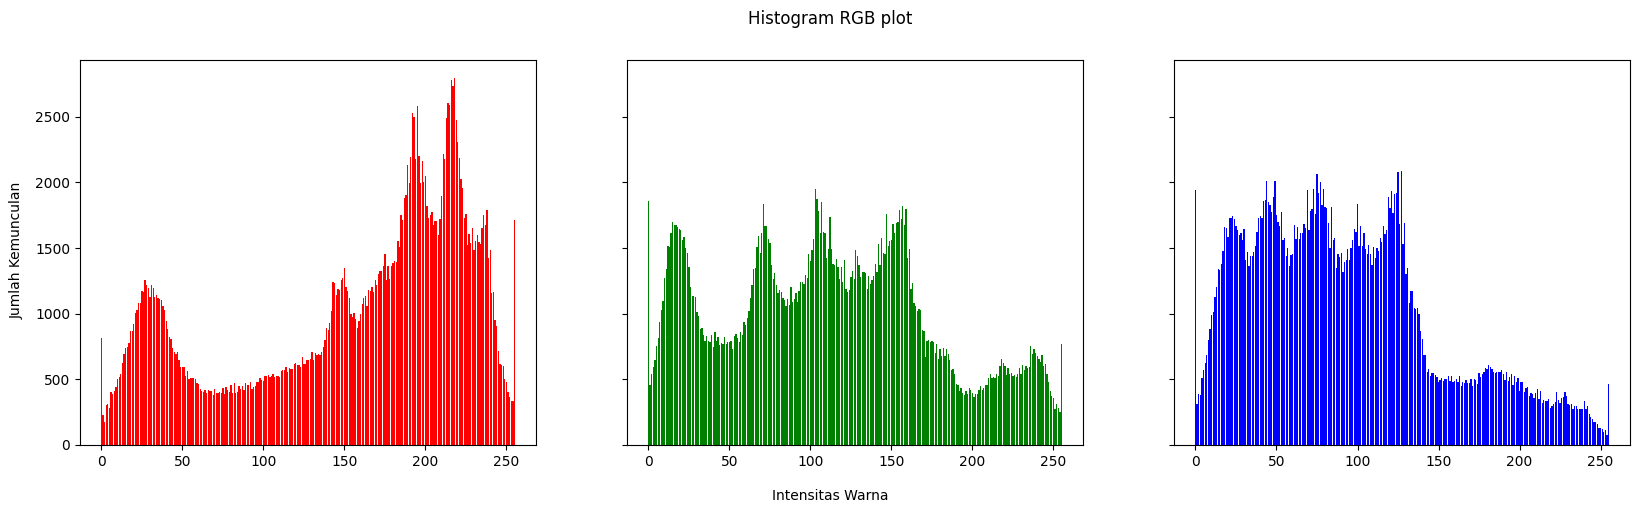

In [68]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


# Pertanyaan Praktikum D1

## Soal 1

Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

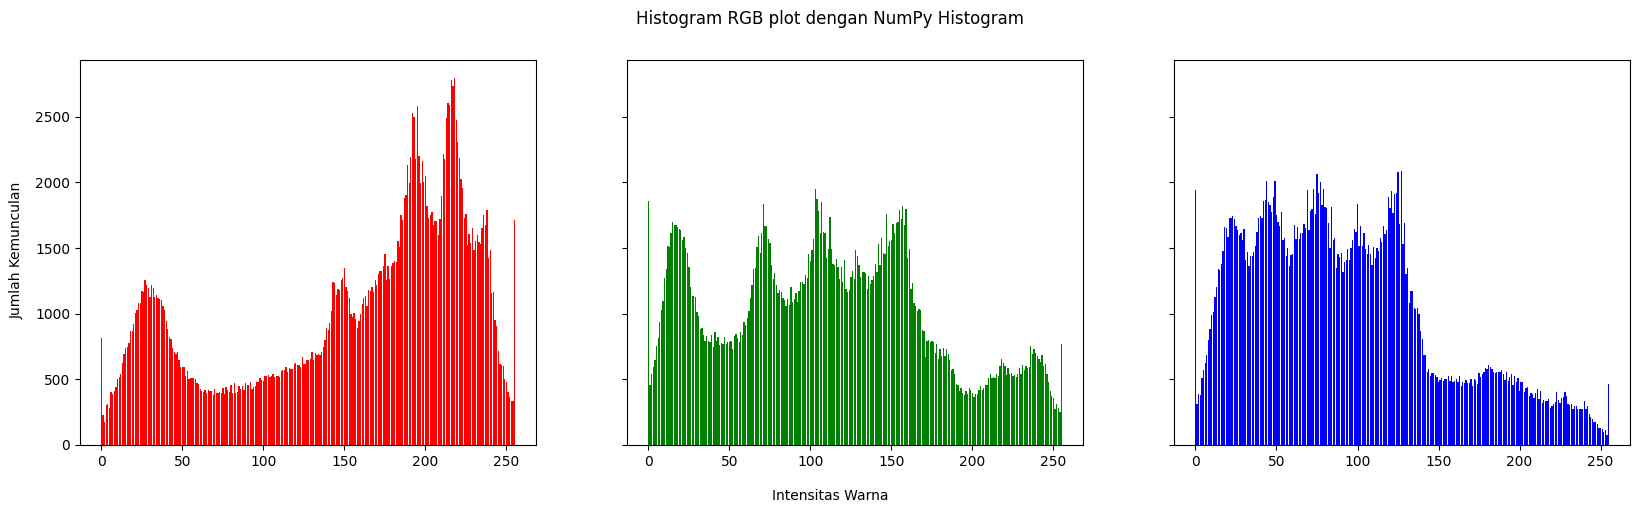

In [69]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram dengan NumPy
hist_red, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot dengan NumPy Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')
plt.show()

**Jawaban:**  
- Bentuk grafik dan jumlah frekuensi yang dihasilkan oleh `np.histogram` sama dengan metode manual.
- Keunggulan dari `np.histogram` adalah prosesnya jauh lebih cepat dan sederhana, karena tidak memerlukan perulangan (loop) secara manual.

## Soal 2

Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

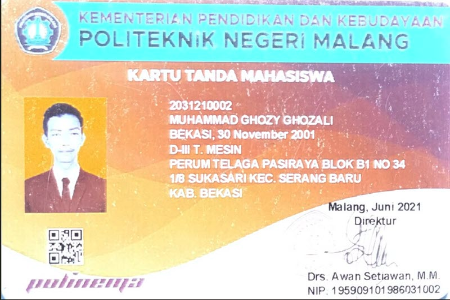

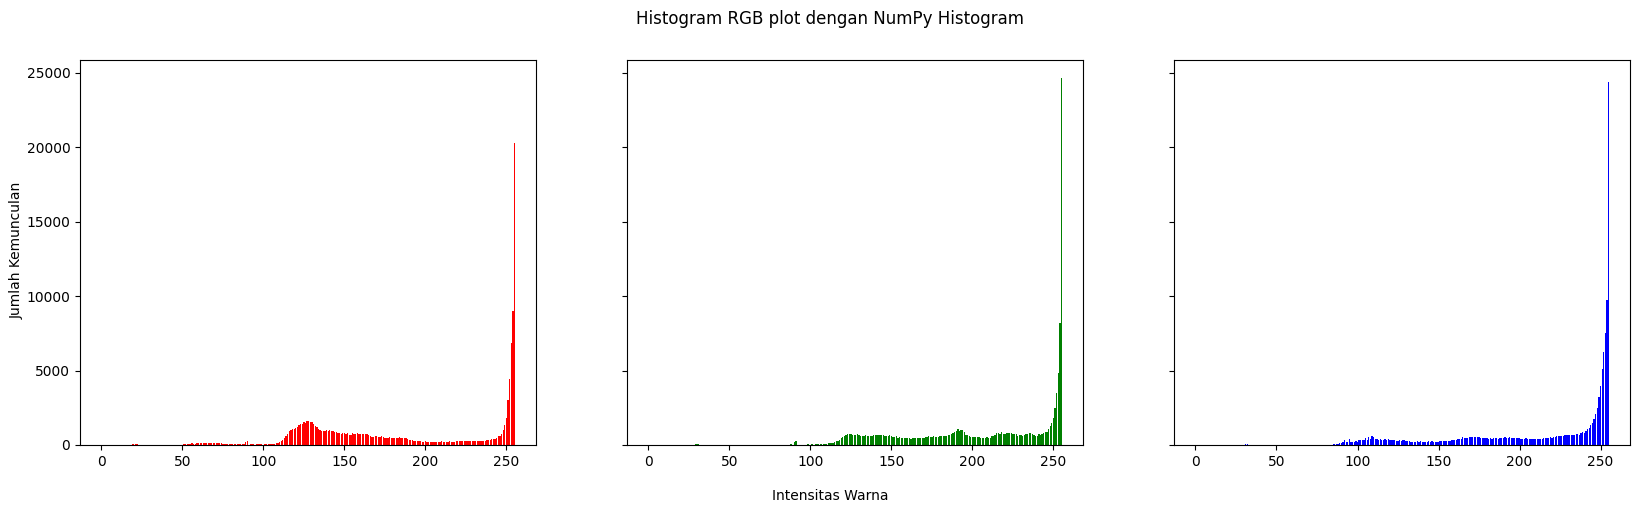

In [70]:
img2 = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/KTM_lama.jpg')
ktm2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
ktm = cv.resize(ktm2, (450, 300))
cv2_imshow(ktm)

# Histogram dengan NumPy
hist_red, _ = np.histogram(ktm[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(ktm[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(ktm[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot dengan NumPy Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')
plt.show()

**Analisis gambar KTM lama.jpg:**

Berdasarkan histogram, distribusi intensitas gambar KTM lama.jpg didominasi pada intensitas tinggi (mendekati 255). Hal ini menunjukkan bahwa gambar cenderung terang dengan kontras yang relatif rendah.

# D2 - Percobaan Histogram Equalization

## 1. Membuat Histogram Equalization

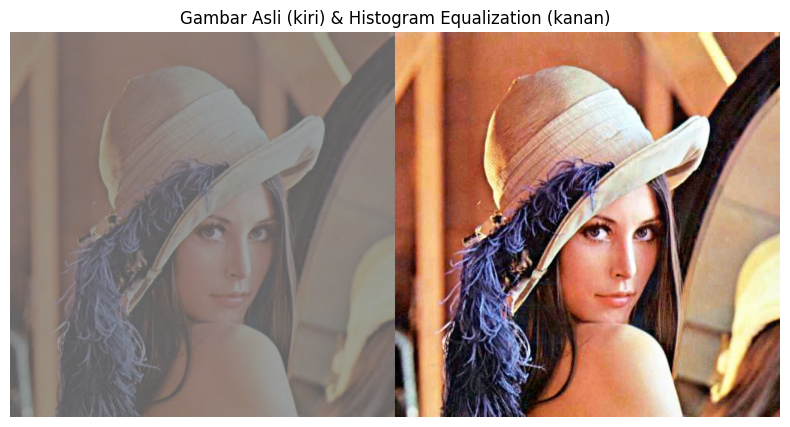

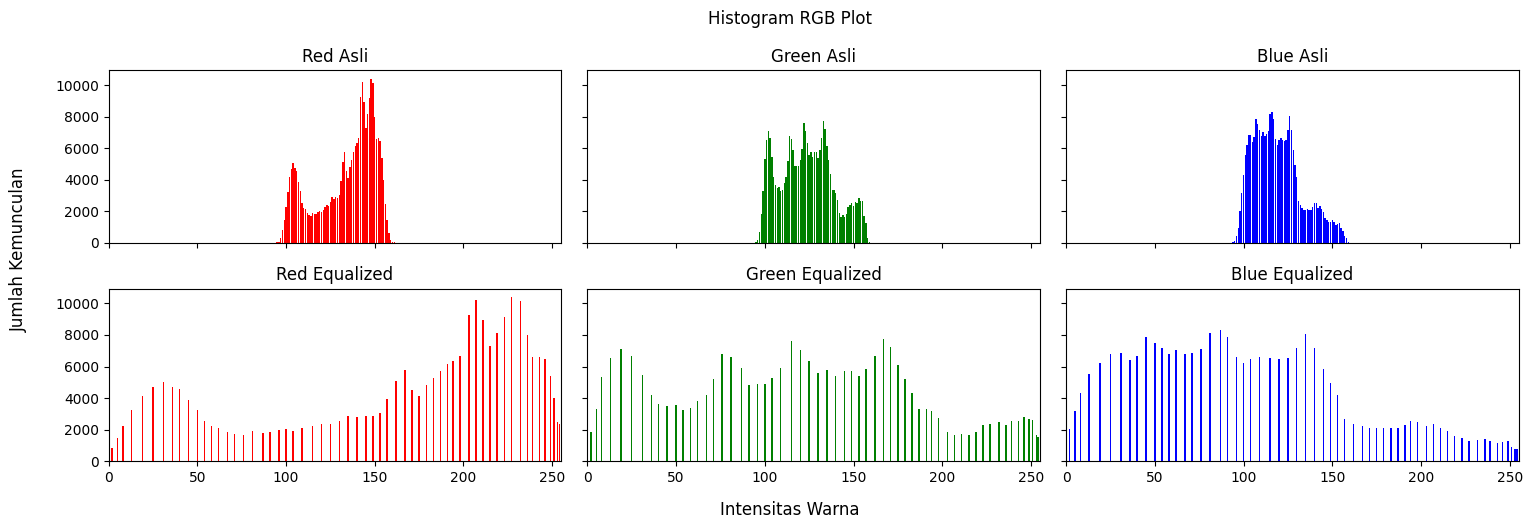

In [71]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Fungsi untuk hitung histogram per channel
def histog(img):
    h, w, c = img.shape
    hist = np.zeros((3,256), dtype=int)
    for y in range(h):
        for x in range(w):
            r, g, b = img[y, x]
            hist[0, r] += 1
            hist[1, g] += 1
            hist[2, b] += 1
    return hist

# Hitung histogram gambar asli
histo_asli = histog(img)

# Histogram global
img_array = img.flatten()
histogram_array = np.bincount(img_array, minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

# Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Transformasi gambar menggunakan tabel pencarian
eq_img_array = transform_map[img_array]
eq_img = np.reshape(eq_img_array, img.shape)

# Menghitung histogram gambar setelah transformasi
equal_histo = histog(eq_img)

# Menggabungkan gambar sebelum & sesudah
final_frame = np.hstack((img, eq_img))

# Menampilkan gambar hasil transformasi
plt.figure(figsize=(10,5))
plt.imshow(final_frame)
plt.title("Gambar Asli (kiri) & Histogram Equalization (kanan)")
plt.axis('off')
plt.show()

# Plot histogram RGB sebelum/sesudah
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')

fig.text(-0.02, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)  # di kiri
fig.text(0.5, -0.03, 'Intensitas Warna', ha='center', fontsize=12)          # di bawah

# Histogram sebelum equalization
axs[0,0].bar(names, histo_asli[0], color='red')
axs[0,0].set_title('Red Asli')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,1].set_title('Green Asli')
axs[0,2].bar(names, histo_asli[2], color='blue')
axs[0,2].set_title('Blue Asli')

# Histogram setelah equalization
axs[1,0].bar(names, equal_histo[0], color='red')
axs[1,0].set_title('Red Equalized')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,1].set_title('Green Equalized')
axs[1,2].bar(names, equal_histo[2], color='blue')
axs[1,2].set_title('Blue Equalized')

for ax in axs.flat:
    ax.set_xlim([0,255])

plt.tight_layout()
plt.show()


## 2. Membuat histogram citra menggunakan library CV2, yaitu `equalizeHist`

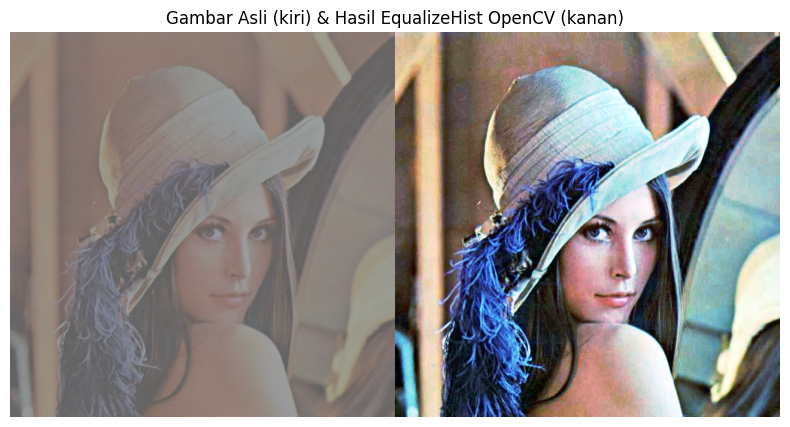

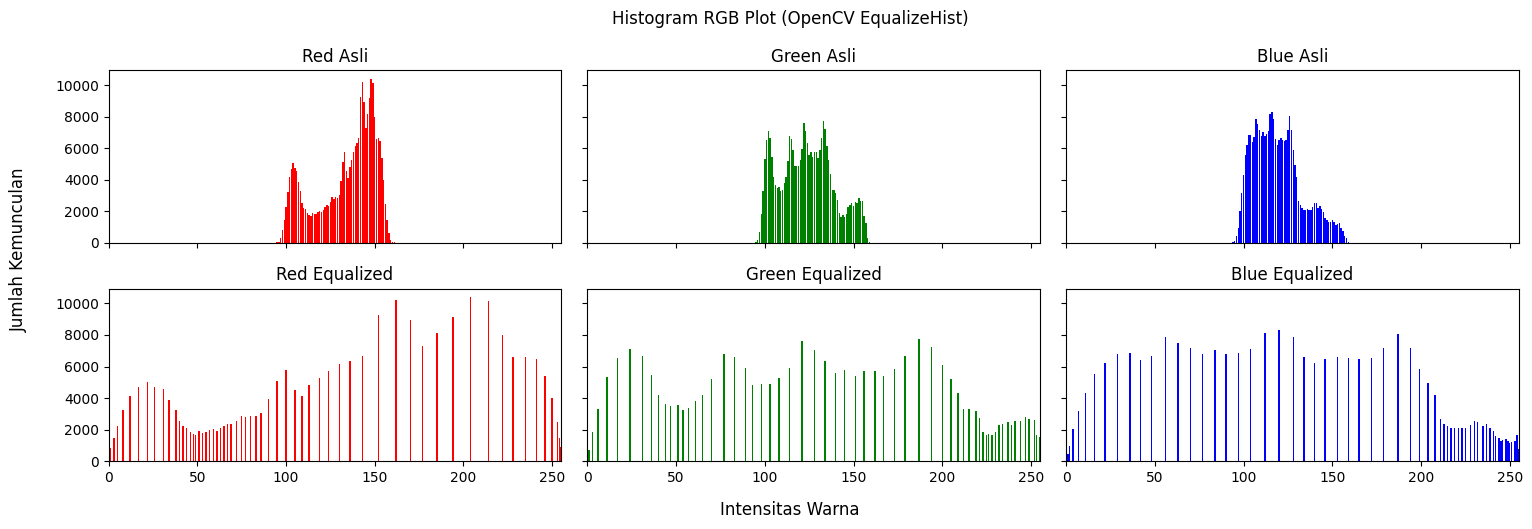

In [72]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

# Equalisasi masing-masing channel
r_equalized = cv.equalizeHist(r)
g_equalized = cv.equalizeHist(g)
b_equalized = cv.equalizeHist(b)

# Menggabungkan channel hasil equalized
img_equalized = cv.merge((r_equalized, g_equalized, b_equalized))

# Menggabungkan gambar asli dan equalized untuk ditampilkan
final_frame = np.hstack((img, img_equalized))

plt.figure(figsize=(10,5))
plt.imshow(final_frame)
plt.title("Gambar Asli (kiri) & Hasil EqualizeHist OpenCV (kanan)")
plt.axis('off')
plt.show()

def histog(img):
    h, w, c = img.shape
    hist = np.zeros((3,256), dtype=int)
    for y in range(h):
        for x in range(w):
            r, g, b = img[y, x]
            hist[0, r] += 1
            hist[1, g] += 1
            hist[2, b] += 1
    return hist

histo_asli = histog(img)
equal_histo = histog(img_equalized)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (OpenCV EqualizeHist)')

fig.text(-0.02, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, -0.03, 'Intensitas Warna', ha='center', fontsize=12)

# Histogram sebelum equalization
axs[0,0].bar(names, histo_asli[0], color='red')
axs[0,0].set_title('Red Asli')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,1].set_title('Green Asli')
axs[0,2].bar(names, histo_asli[2], color='blue')
axs[0,2].set_title('Blue Asli')

# Histogram setelah equalization OpenCV
axs[1,0].bar(names, equal_histo[0], color='red')
axs[1,0].set_title('Red Equalized')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,1].set_title('Green Equalized')
axs[1,2].bar(names, equal_histo[2], color='blue')
axs[1,2].set_title('Blue Equalized')

for ax in axs.flat:
    ax.set_xlim([0,255])

plt.tight_layout()
plt.show()


**Hasil:**

Output pada langkah 2 tidak sama persis dengan langkah 1.

Langkah 1 menghitung histogram kumulatif gabungan seluruh channel secara manual, sedangkan `cv2.equalizeHist()` pada langkah 2 melakukan equalization per channel (Red, Green, Blue), sehingga hasilnya sedikit berbeda meski tujuannya sama-sama meratakan distribusi intensitas.

# Pertanyaan Praktikum 2



## Soal 1 - Perbandingan Citra Lena

### a. Gunakan hasil histogram equalization pada citra lena.jpg.
### b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.


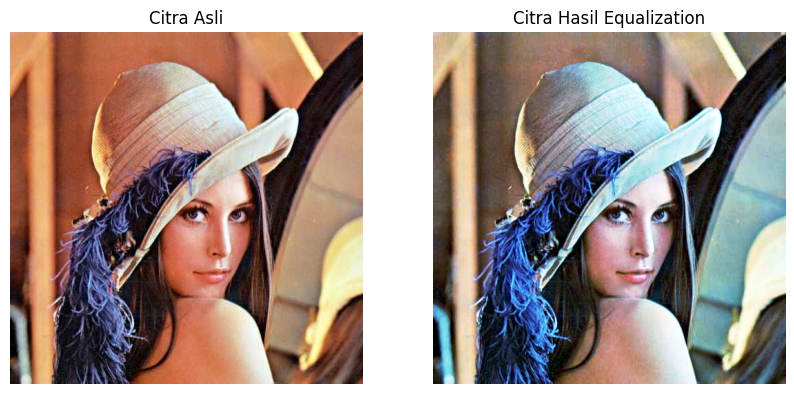

MSE: 1042.89410
PSNR: 17.94840 dB


In [73]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram Equalization per channel
r, g, b = cv.split(img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

eq_img = cv.merge((r_eq, g_eq, b_eq))

# Menampilkan perbandingan gambar asli dan hasil equalization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eq_img)
plt.title('Citra Hasil Equalization')
plt.axis('off')

plt.show()

# Menghitung PSNR
img_float = img.astype(np.float64)
eq_img_float = eq_img.astype(np.float64)

mse = np.mean((img_float - eq_img_float) ** 2)

if mse == 0:
    psnr = float('inf')
else:
    psnr = 10 * math.log10((255 ** 2) / mse)

print(f"MSE: {mse:.5f}")
print(f"PSNR: {psnr:.5f} dB")


### c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?

**Jawaban:**

Berdasarkan hasil perhitungan, nilai PSNR antara citra asli dan citra hasil histogram equalization sebesar 17.95 dB, yang tergolong rendah. Hal ini terjadi karena proses equalization mengubah distribusi intensitas piksel secara signifikan sehingga terjadi perbedaan numerik yang cukup besar terhadap citra asli. Meski demikian, secara visual kontras citra meningkat dan detail di area gelap maupun terang menjadi lebih jelas.

## Soal 2 - Menggunakan Citra KTM Lama

### a. Terapkan histogram equalization pada citra KTM lama.jpg.

In [74]:
img_ktm = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/KTM_lama.jpg')
img_ktm = cv.cvtColor(img_ktm, cv.COLOR_BGR2RGB)

# Histogram Equalization per channel
r, g, b = cv.split(img_ktm)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

eq_img_ktm = cv.merge((r_eq, g_eq, b_eq))

### b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya dalam satu layout.

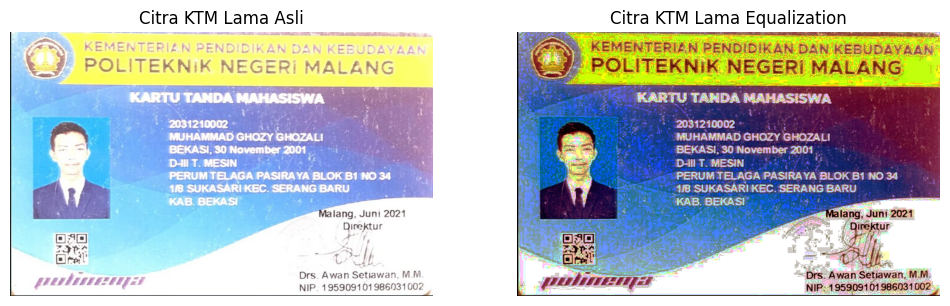

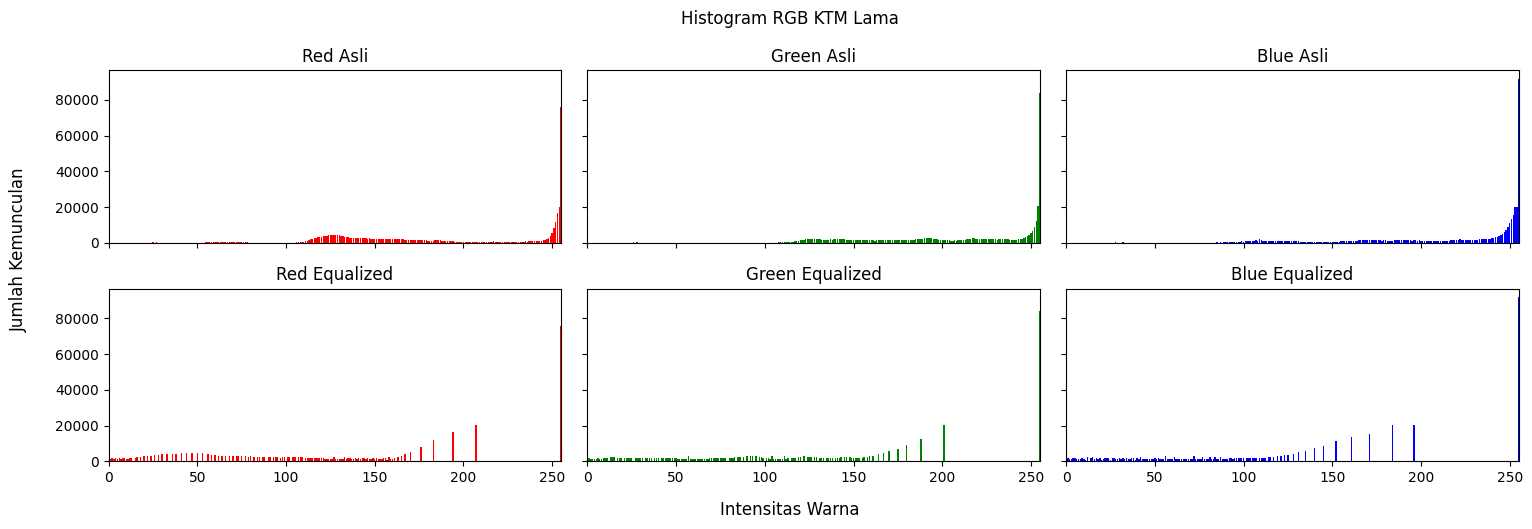

In [75]:
# Fungsi hitung histogram per channel
def histog(img):
    h, w, c = img.shape
    hist = np.zeros((3,256), dtype=int)
    for y in range(h):
        for x in range(w):
            r, g, b = img[y, x]
            hist[0, r] += 1
            hist[1, g] += 1
            hist[2, b] += 1
    return hist

histo_asli = histog(img_ktm)
histo_eq = histog(eq_img_ktm)

# Layout: gambar asli dan equalized
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_ktm)
plt.title('Citra KTM Lama Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eq_img_ktm)
plt.title('Citra KTM Lama Equalization')
plt.axis('off')
plt.show()

# Layout: histogram RGB sebelum & sesudah
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB KTM Lama')

fig.text(-0.02, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, -0.03, 'Intensitas Warna', ha='center', fontsize=12)

# Histogram sebelum equalization
axs[0,0].bar(names, histo_asli[0], color='red')
axs[0,0].set_title('Red Asli')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,1].set_title('Green Asli')
axs[0,2].bar(names, histo_asli[2], color='blue')
axs[0,2].set_title('Blue Asli')

# Histogram setelah equalization
axs[1,0].bar(names, histo_eq[0], color='red')
axs[1,0].set_title('Red Equalized')
axs[1,1].bar(names, histo_eq[1], color='green')
axs[1,1].set_title('Green Equalized')
axs[1,2].bar(names, histo_eq[2], color='blue')
axs[1,2].set_title('Blue Equalized')

for ax in axs.flat:
    ax.set_xlim([0,255])

plt.tight_layout()
plt.show()


### c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization. Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah, teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

**Jawaban:**

Setelah dilakukan histogram equalization pada citra KTM Lama, warna pada citra menjadi lebih kontras dibandingkan citra asli yang tampak lebih pudar. Detail pada wajah, teks, dan latar belakang terlihat lebih jelas dan mudah dibaca sehingga kualitas informasinya meningkat. Namun, peningkatan kontras tersebut juga membuat warna tampak lebih tajam/kuat sehingga citra terlihat sedikit keras dibandingkan citra aslinya.

# Tugas Praktikum D3 - Dithering

## Nomor 1

Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart! (Gunakan gambar lena.jpg)

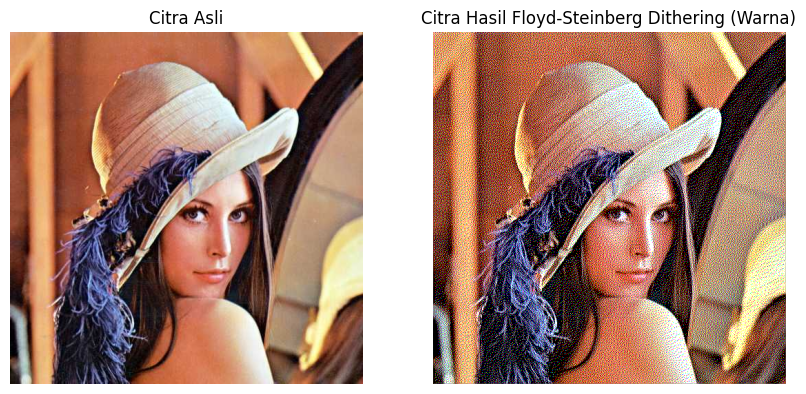

In [76]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = img.astype(np.float32)

h, w, c = img.shape
output = img.copy()

# Terapkan Floyd-Steinberg dithering per channel
for ch in range(3):  # 0=R,1=G,2=B
    for y in range(h-1):
        for x in range(1, w-1):
            old_pixel = output[y, x, ch]
            new_pixel = 255 if old_pixel > 128 else 0  # biner 0/255
            output[y, x, ch] = new_pixel
            error = old_pixel - new_pixel

            output[y, x+1, ch] += error * 7/16
            output[y+1, x-1, ch] += error * 3/16
            output[y+1, x, ch] += error * 5/16
            output[y+1, x+1, ch] += error * 1/16

output = np.clip(output, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output)
plt.title('Citra Hasil Floyd-Steinberg Dithering (Warna)')
plt.axis('off')
plt.show()


## Nomor 2

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg!

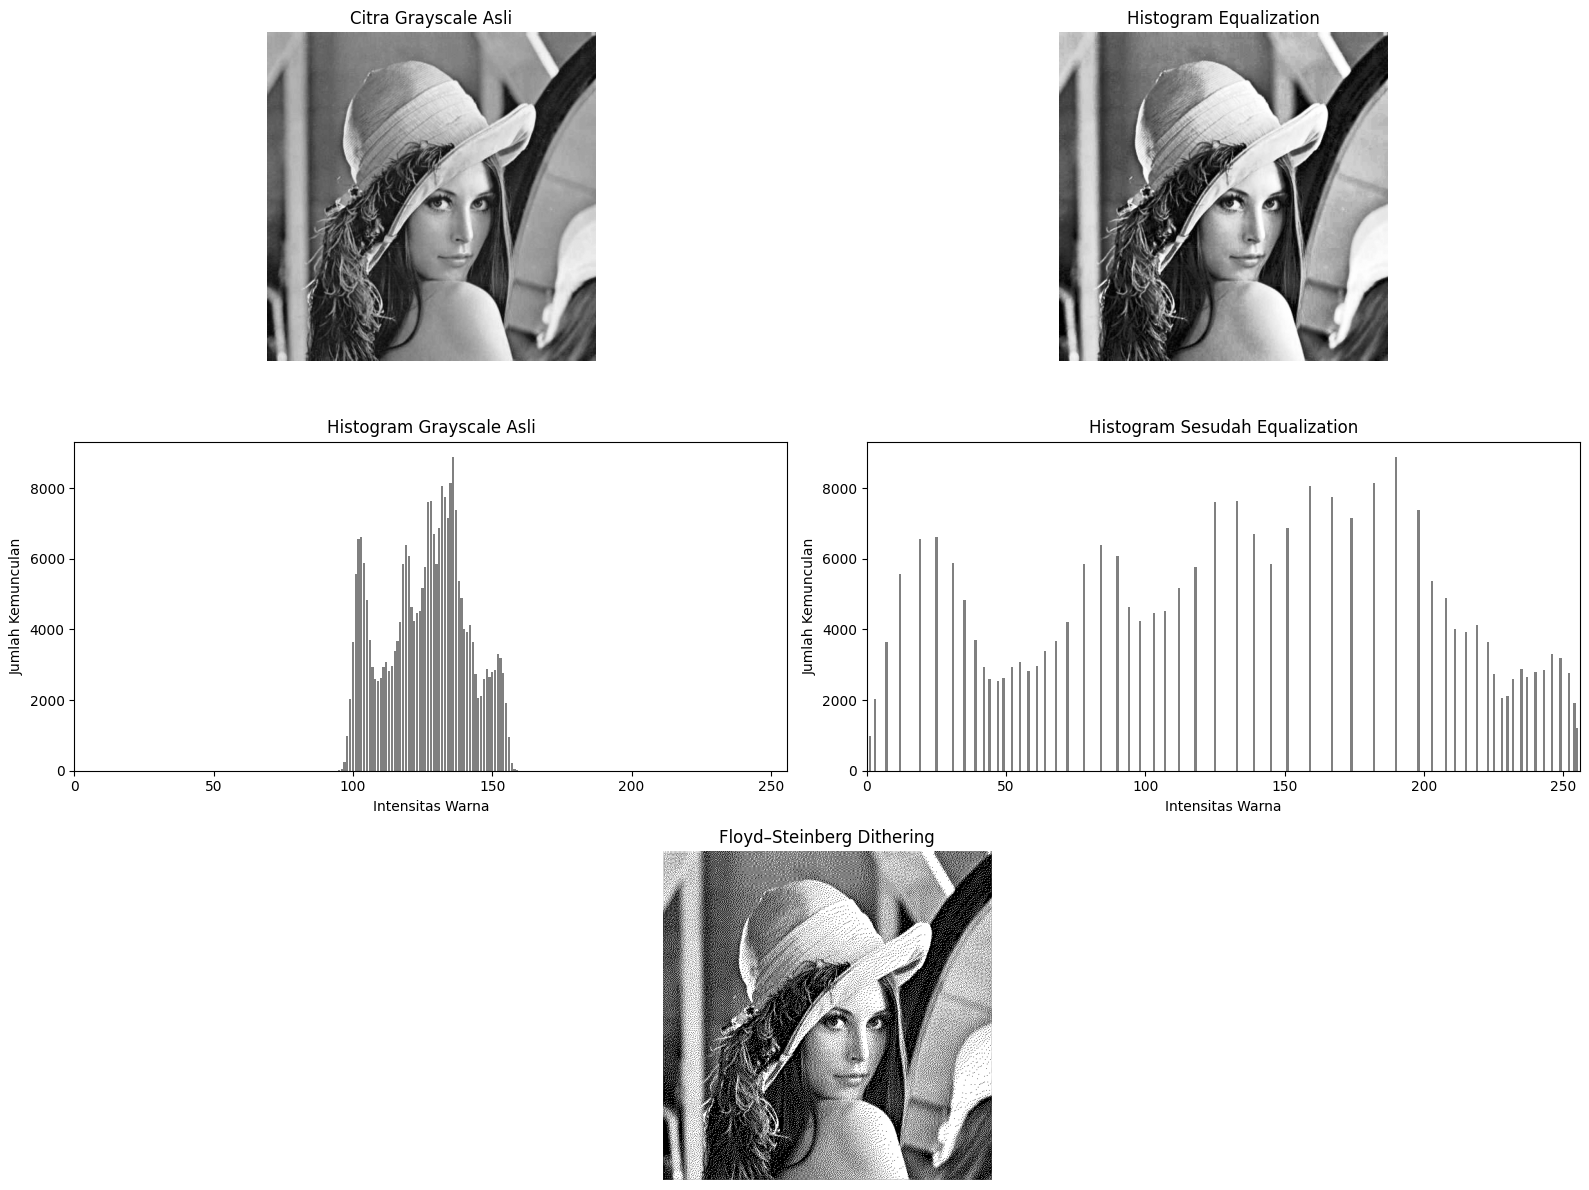

In [77]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena_lc.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Histogram Equalization
gray_eq = cv.equalizeHist(gray)

hist_before, bins = np.histogram(gray.flatten(), 256, [0,256])
hist_after, bins = np.histogram(gray_eq.flatten(), 256, [0,256])

names = np.arange(256)

# Floyd–Steinberg Dithering pada hasil equalization
dither = gray_eq.astype(np.float32)
h, w = dither.shape

for y in range(h-1):
    for x in range(1, w-1):
        old_pixel = dither[y, x]
        new_pixel = 255 if old_pixel > 128 else 0
        dither[y, x] = new_pixel
        error = old_pixel - new_pixel

        dither[y, x+1] += error * 7/16
        dither[y+1, x-1] += error * 3/16
        dither[y+1, x] += error * 5/16
        dither[y+1, x+1] += error * 1/16

dither_img = np.clip(dither, 0, 255).astype(np.uint8)

# Plot semua output
fig = plt.figure(figsize=(16,12))

# gambar grayscale & equalized
plt.subplot(3,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale Asli')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(gray_eq, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# histogram before & after
ax3 = plt.subplot(3,2,3)
ax3.bar(names, hist_before, color='gray')
ax3.set_title('Histogram Grayscale Asli')
ax3.set_xlim([0,256])
ax3.set_xlabel('Intensitas Warna')
ax3.set_ylabel('Jumlah Kemunculan')

ax4 = plt.subplot(3,2,4)
ax4.bar(names, hist_after, color='gray')
ax4.set_title('Histogram Sesudah Equalization')
ax4.set_xlim([0,256])
ax4.set_xlabel('Intensitas Warna')
ax4.set_ylabel('Jumlah Kemunculan')

# hasil dithering
plt.subplot(3,1,3)
plt.imshow(dither_img, cmap='gray')
plt.title('Floyd–Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()
